In [44]:
import os
import gym 
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [45]:
#environment_name = "Pong-v0"

#rewards = [[1,1,6],[1,3,4]]
#rewards = [[1,0,5]]
rewards = [[1,1,6],[1,3,4]]


In [46]:
''''
#env = gym.make(environment_name)
from GridEnv import WindyGridworld
env = WindyGridworld(
        height=20,
        width=11,
        rewards=rewards,
        wind=True,
        allowed_actions=['L', 'R', 'C'],
        reward_terminates_episode=False
    )'''

from GridEnv import WindyGridworld
env = env = WindyGridworld(
        height=20,
        width=11,
        rewards=rewards,
        wind=True,
        allowed_actions=['L', 'R', 'C'],
        reward_terminates_episode=False
    )

print(env.rewards)


[[1, 1, 6], [1, 3, 4]]


In [47]:
log_path = os.path.join('Training', 'Logs')
#model_name = 'DQN_model_Env1_0.4exp_20kBuff_5m'
model_name = 'Env2_Full_2M'
load_path = os.path.join('Training', 'Saved Models',model_name)
model = DQN.load(load_path, env = env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [48]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)
env.close()

/usr/local/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
QObject::moveToThread: Current thread (0x55c80db0d3e0) is not the object's thread (0x55c89355dee0).
Cannot move to target thread (0x55c80db0d3e0)

QObject::moveToThread: Current thread (0x55c80db0d3e0) is not the object's thread (0x55c89355dee0).
Cannot move to target thread (0x55c80db0d3e0)

QObject::moveToThread: Current thread (0x55c80db0d3e0) is not the object's thread (0x55c89355dee0).
Cannot move to target thread (0x55c80db0d3e0)

QObject::moveToThread: Current thread (0x55c80db0d3e0) is not the object's thread (0x55c89355dee0).
Cannot move to target thread (0x55c80db0d3e0)

QObject::moveToThread: Current thread (0x55c80db0d3e0) is not t

In [49]:
env.close()

In [50]:
from GridEnv import *

In [51]:
# Genereate Image for each state, maybe dict{state: img}

env_w = env.width
env_l = env.height

w = 0
# Loop width of env
state_img_dict = dict()
while w < env_w:
    l = 0
    # Loop height of env
    while l< env_l:
        env.reset()
        env.set_pos(l,w)
        img = visualize(env)
        state_img_dict[(l,w)] = img
        
        l+=1
        
    w += 1

print(state_img_dict.keys())
# loop the dict and add the value for each image{}

# Render the state, value 

dict_keys([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (11, 5), (12, 5), (13, 5), (14, 5), (15, 5), (16, 

cuda:0
(84, 84, 3)
(1, 3, 84, 84)


array([[-0.08395533,  0.20290846, -0.12223874]], dtype=float32)

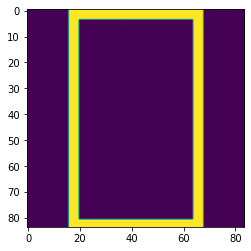

In [52]:
model.predict(state_img_dict[(0, 4)],deterministic=True)

import matplotlib.pyplot as plt
import torch as th 
from stable_baselines3.common.utils import obs_as_tensor

device = th.device('cuda:0')

print(device)


obs = state_img_dict[(0, 4)]
print(obs.shape)

observation = np.transpose(obs,(2,0,1))
observation = observation[np.newaxis,...]
print(observation.shape)
plt.imshow(observation[0,0,:,:])
#plt.imshow(obs[:,:,0])

observation = obs_as_tensor(observation, device)
with th.no_grad():
    q_values = model.q_net(observation)

q_values.cpu().detach().numpy()



In [53]:
# loop the dict and add the value for each image{}
state_img_dict[(0, 0)]

img = np.ones((20,11))

for key in state_img_dict.keys():
    state = key
    obs = state_img_dict[key]
                
    observation = np.transpose(obs,(2,0,1))
    observation = observation[np.newaxis,...]
    observation = obs_as_tensor(observation, device)
    with th.no_grad():
        q_values = model.q_net(observation)
        
    max_val = np.max(q_values.cpu().detach().numpy())

    
    img[state[0],state[1]] = max_val


In [54]:
#img

In [55]:
import matplotlib.pyplot as plt


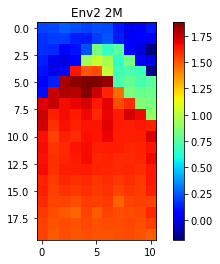

In [58]:
plt.imshow(img, cmap='jet')
plt.title("Env2 2M")
plt.colorbar()
plt.show()

In [57]:

plt.savefig("Env2-Qval.png")

<Figure size 432x288 with 0 Axes>